# SyriaTel  Customer churn

### INTRODUCTION 

In the current world of business, customer satisfaction has become an integral part for business success. We will be using CRISP-DM methodology in trying to find a solution for our stakeholders at SyriaTel in order to find a solution for customer churning


In the following sections, we will detail the steps involved in developing classification models, from data preparation, to model training, evaluation, and deployment with the goal to provide a comprehensive, actionable solution that empowers Syriatel to reduce churn and sustain its growth in the competitive telecom landscape

The project structure is as follows:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Explaratory Data Analysis
5. Modeling 
6. Model Evaluation
7. Recomendations and Conclusions

### 1. Business Understanding

SyriaTel company is a telecomunication company focused on being one the best in providing quality services to its customers and therefore they need to be competetive and be aware of there customers dynamics and preferences. 

Although such efforts have been fruitful over the years, the company needs to increase its commitment to reducing customer charning rates, which might threaten its market position, profitability, and overall growth. Retaining customers will increase the company's net profits by reducing costs involved in lossing customers.

#### Primary stakeholders

<li> SyriaTel company

#### Other stakeholders

<li>Shareholders
<li>Employees
<li>Customers

The project aims to provide value to the different stakeholders by identifying predictable patterns related to customer churn, which can help SyriaTel take proactive measures to retain customers and minimize revenue loss


##### Research questions to ask


<li> What is the main reason customers leave?
<li> What retention strategies are currently in place?
<li> What is the financial impact of customer churn?

#### Research Objectives


Here are some of the research objectives:
   <li> Impove customer services
   <li> identify key Drivers of churn
   <li> Reduce the costs associated with customer churning by being able to predict in advance

### 2. Data Understanding

In [11]:
# let us import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from My_functions import *

In [22]:
def load_data(data):
    df = pd.read_csv(data)
    # ------------------Head------------------
    head = df.head()
    # ------------------Describe------------------
    shape = df.shape 
    # ------------------Info------------------
    info = df.info()

    output = {'Head': head,
              'Shape': shape,
              'info': info
             }

    return output
load_data(r'C:\Users\USER\Desktop\Data\PHASE3\Phase3-SyriaTel\data\bigml_59c28831336c6604c800002a.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

{'Head':   state  account length  area code phone number international plan  \
 0    KS             128        415     382-4657                 no   
 1    OH             107        415     371-7191                 no   
 2    NJ             137        415     358-1921                 no   
 3    OH              84        408     375-9999                yes   
 4    OK              75        415     330-6626                yes   
 
   voice mail plan  number vmail messages  total day minutes  total day calls  \
 0             yes                     25              265.1              110   
 1             yes                     26              161.6              123   
 2              no                      0              243.4              114   
 3              no                      0              299.4               71   
 4              no                      0              166.7              113   
 
    total day charge  ...  total eve calls  total eve charge  \
 0          

Our data has 21 features and 3333 records.
Here is the breakdown of our Features and what they entail:
<br>
   <li>State: The state the customer lives in
   <li>Account Length: The number of days the customer has had an account.
   <li>Area Code: The area code of the customer
   <li>Phone Number: The phone number of the customer
   <li>International Plan: True if the customer has the international plan, otherwise false
   <li>Voice Mail Plan: True if the customer has the voice mail plan, otherwise false.
   <li>Number Vmail Messages: the number of voicemails the customer has sent.
   <li>Total Day Minutes: total number of minutes the customer has been in calls during the day
   <li>Total Day Calls: total number of calls the user has done during the day
   <li>Total Day Charge: total amount of money the customer was charged by the Telecom company for calls during the day
   <li>Total Eve Minutes: total number of minutes the customer has been in calls during the evening
   <li>Total Eve Calls: total number of calls the customer has done during the evening.
   <li>Total Eve Charge: total amount of money the customer was charged by the Telecom company for calls during the evening.
   <li>Total Night Minutes: total number of minutes the customer has been in calls during the night
   <li>Total Night Calls: total number of calls the customer has done during the night.
   <li>Total Night Charge: total amount of money the customer was charged by the Telecom company for calls during the night.
   <li>Total Intl Minutes: total number of minutes the user has been in international calls.
   <li>Total Intl Calls: total number of international calls the customer has done.
   <li>Total Intl Charge: total amount of money the customer was charged by the Telecom company for international calls
   <li>Customer Service Calls: number of calls the customer has made to customer service.
   <li>Churn: true if the customer terminated their contract, otherwise false

The data has a mix of different data types as well mainly:
   <li> Object
   <li> Integers
   <li> Floats
   <li> Booleans

### 3. Data Preparation

Under data preparation we will look at the null values, shape of our data, missing values, duplicates and outliers and there treatment

In [52]:
class DataCleaning:
    def __init__(self, data):
        self.data = pd.read_csv(data)

    def duplicates(self):
        """
        This function checks for duplicates in our dataset
        """
        return self.data.duplicated().sum()

    def missing(self):
        """
        This function returns the percentage of missing values
        """
        total_cells = np.product(self.data.shape)
        missing_count = self.data.isnull().sum().sum()
        return (missing_count / total_cells) * 100

    def outliers(self):
        """ 
        This function checks for outliers in the entire dataset and displays 
        boxplots for numerical columns in a grid of 3 columns.
        """
        num_cols = self.data.select_dtypes(include='number').columns
        num_plots = len(num_cols)
        num_rows = np.ceil(num_plots / 3).astype(int)
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(21, 4 * num_rows))
        axs = axs.flatten()  # Flatten the array to easily iterate over it
        
        for idx, col in enumerate(num_cols):
            sns.boxplot(data=self.data, x=col, ax=axs[idx])
            axs[idx].set_title(col)
        
        # Remove any unused subplots
        for j in range(idx + 1, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()

    def distribution(self):
        """This function checks for the distribution of numerical columns in the dataset
        and displays histograms with KDE in a grid of 3 columns."""
        
        num_cols = self.data.select_dtypes(include='number').columns
        num_plots = len(num_cols)
        num_rows = np.ceil(num_plots / 3).astype(int)
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(21, 4 * num_rows))
        axs = axs.flatten()
        
        for idx, col in enumerate(num_cols):
            sns.histplot(data=self.data, x=col, kde=True, ax=axs[idx])
            axs[idx].set_title(f'Distribution of {col}')
        
        # Remove any unused subplots
        for ax in axs[num_plots:]:
            ax.remove()
        
        plt.tight_layout()
        plt.show()


In [63]:
data_prep = DataCleaning(r'C:\Users\USER\Desktop\Data\PHASE3\Phase3-SyriaTel\data\bigml_59c28831336c6604c800002a.csv')
data_prep.missing()

0.0

Great, We do have any missing values in our dataset.
Let us now check for duplicate values as well


In [65]:
data_prep.duplicates()

0

Now let us check for outliers in our dataset

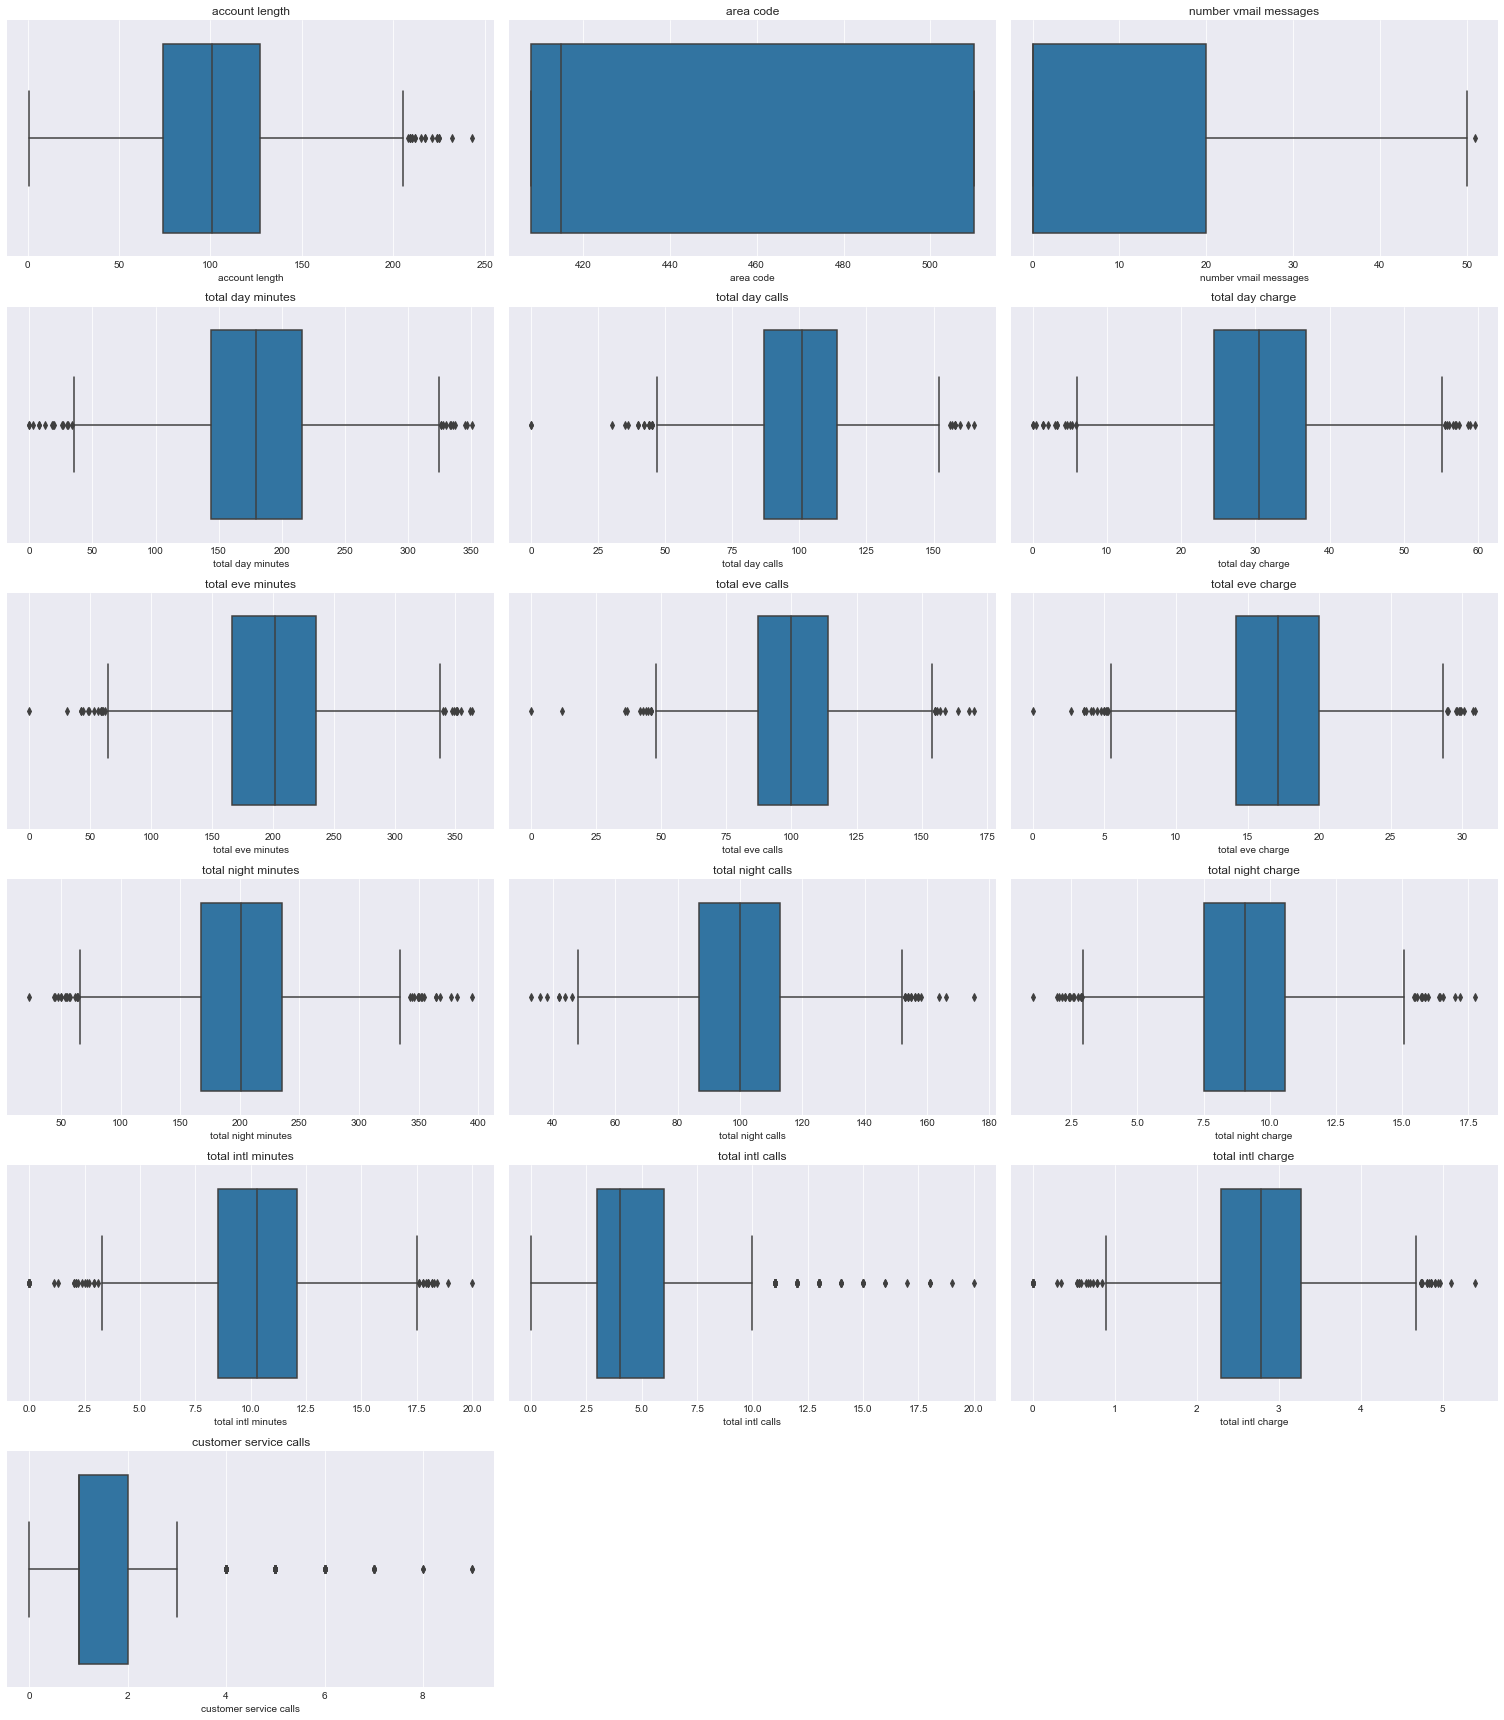

In [66]:
data_prep.outliers()


Our data has outliers on several features including customer service call, total intl charge, total intl call,total intl minutes, total night charge, total night charge, total night calls, total night minutes, total evenning charge, total evening minutes, total evening and others as displayed above.

Before we start the outlier treatment we need to look at the distribution of the dataset as well to see if our data is skewed

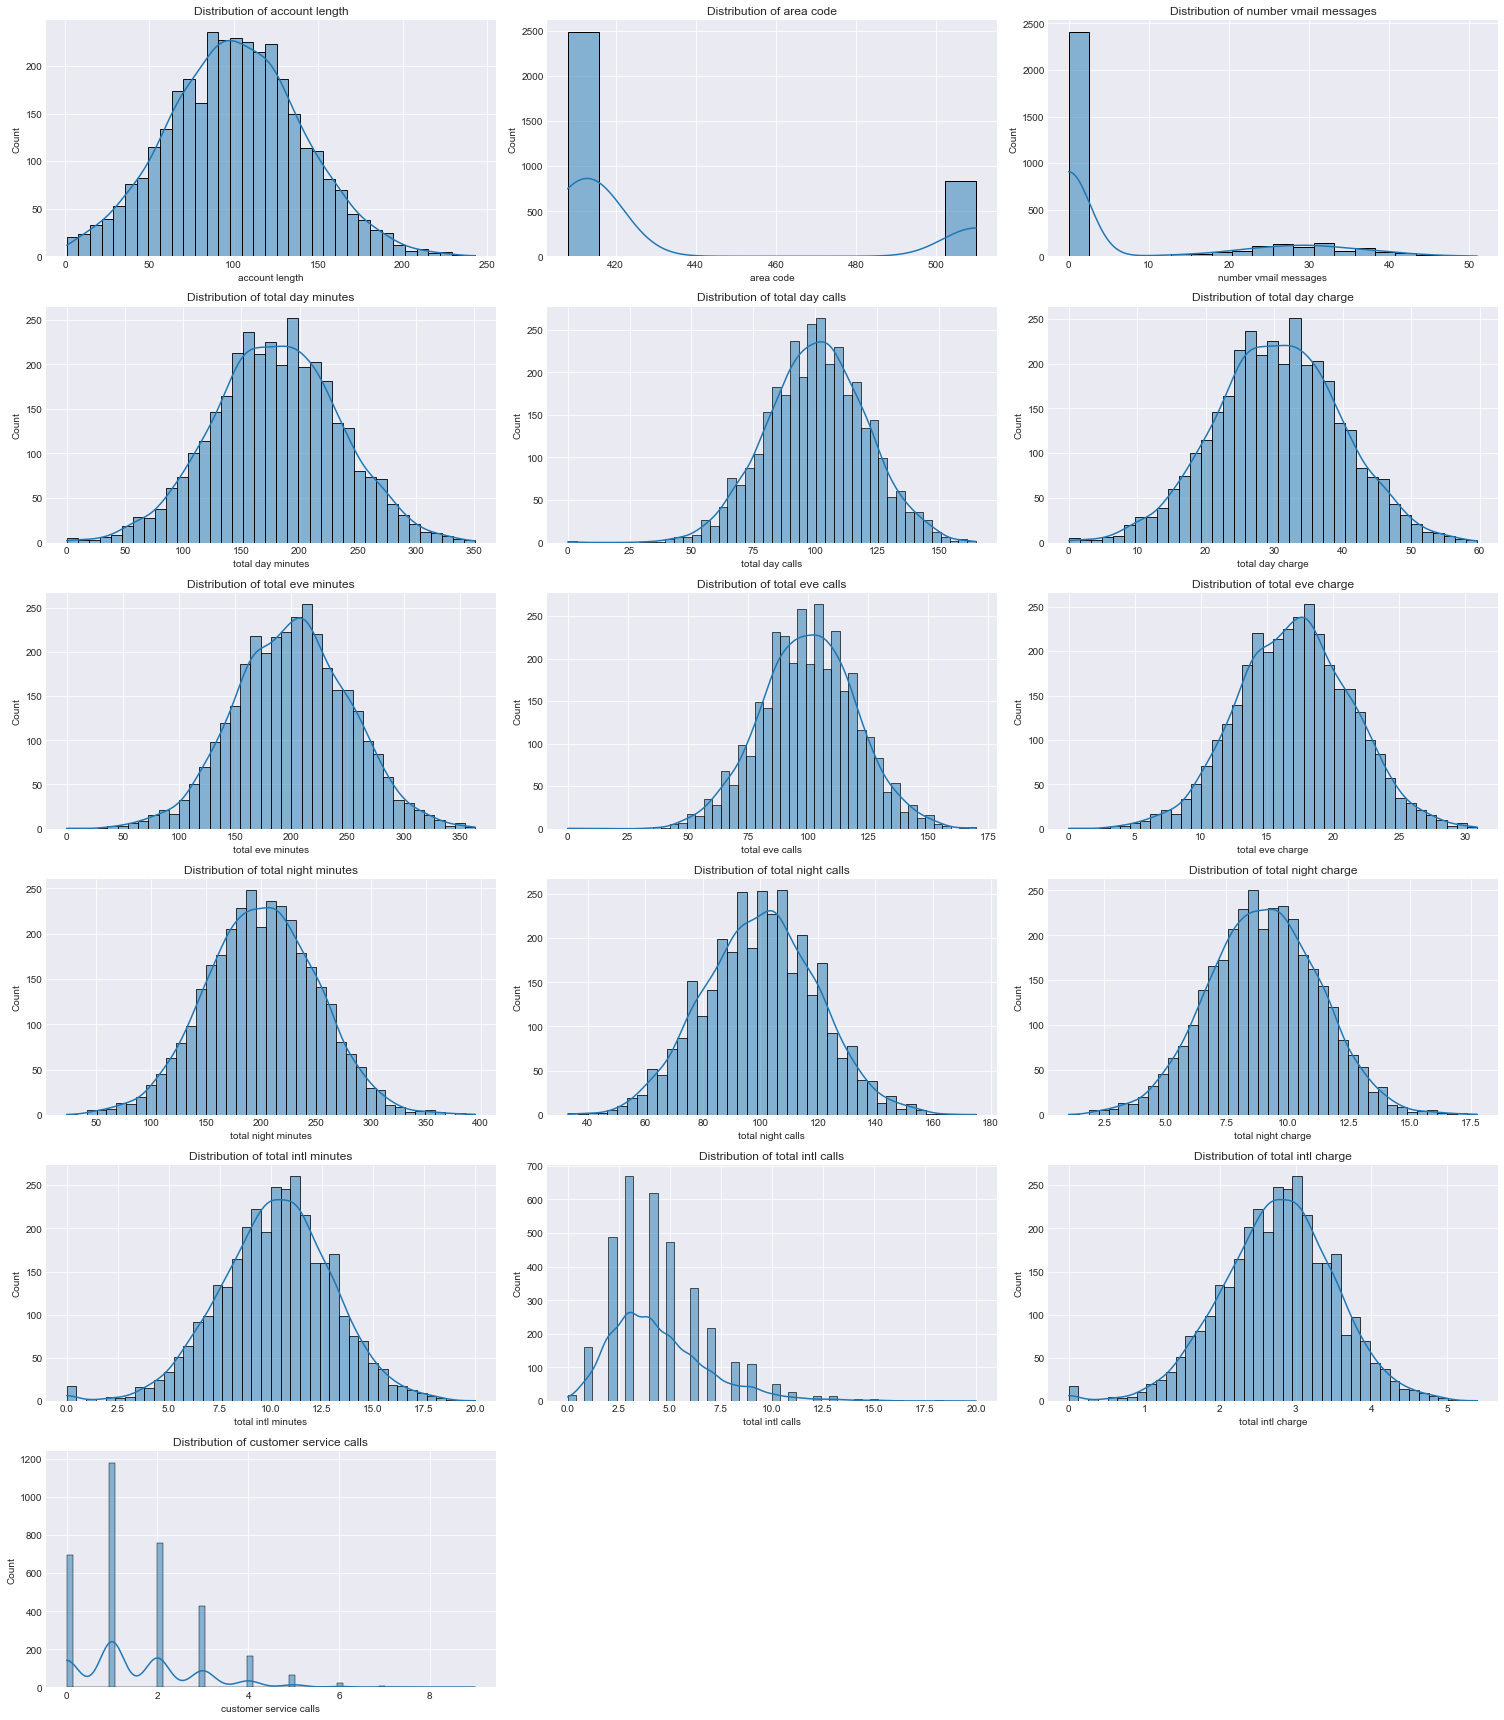

In [67]:
data_prep.distribution()

In [68]:
# removing outliers
def remove_outliers_iqr(df):
    """
    Takes in a dataframe and removes outliers from a dataframe using the IQR method.

    Returns:
    clean dataframe
    """
    # Select only numerical columns
    numerical_df = df.select_dtypes(include='number')
    
    # Compute Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    
    # Filter out the outliers
    df_cleaned = numerical_df[~((numerical_df < lower_bound) | (numerical_df > upper_bound)).any(axis=1)]
    
    # Return the cleaned dataframe with non-numerical columns included
    return df.loc[df_cleaned.index]

# Assuming df is your DataFrame
df = remove_outliers_iqr(df)

Now that we have removed outliers let us check if our code is working

Our code is unable to remove all the outliers in our dataset and therefore we will use data transformation to try and cab this effects. Sometimes not all outliers are as bad either, they might be genuine observation that carry important information. So trying to remove all the outliers in our dataset will result in a significant loss of data which we are avoiding

In [69]:
# checking shape of data
df.shape

(3162, 21)

#### Explaratory Data Analysis

### Bivariate Analysis

Let us look at some bivariate analysis such as correlation against churn 

In [35]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [36]:
# correlation with churn feature
correlation_with_churn = df.corr()['churn'].drop('churn')
print(correlation_with_churn)

account length            0.025860
area code                 0.013415
phone number              0.000429
number vmail messages    -0.094524
total day minutes         0.257482
total day calls           0.021947
total day charge          0.257480
total eve minutes         0.113276
total eve calls           0.007723
total eve charge          0.113258
total night minutes       0.051175
total night calls         0.007671
total night charge        0.051173
total intl minutes        0.064733
total intl calls         -0.066661
total intl charge         0.064784
customer service calls    0.106198
Name: churn, dtype: float64


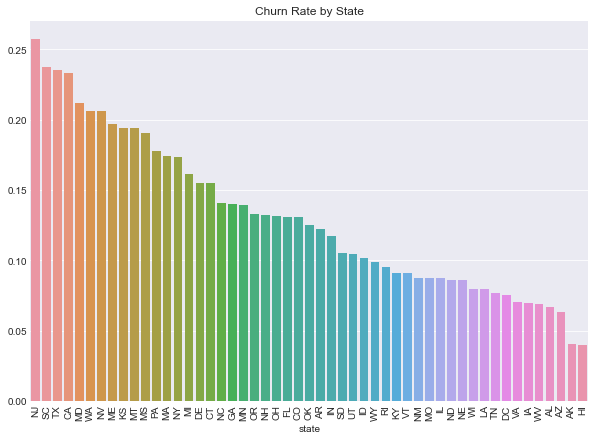

In [134]:
#geographical Analysis
def geographical_analysis(data):
    plt.figure(figsize=(10, 7))
    state_churn = data.groupby('state')['churn'].mean().sort_values(ascending=False)
    sns.barplot(x=state_churn.index, y=state_churn.values)
    plt.title('Churn Rate by State')
    plt.xticks(rotation=90)
    plt.show()

geographical_analysis(df)

The bar graph above shows the churning rate from each state with customers from Nj leading and HI having the least churning rates

### Multivariate Analysis

<AxesSubplot:>

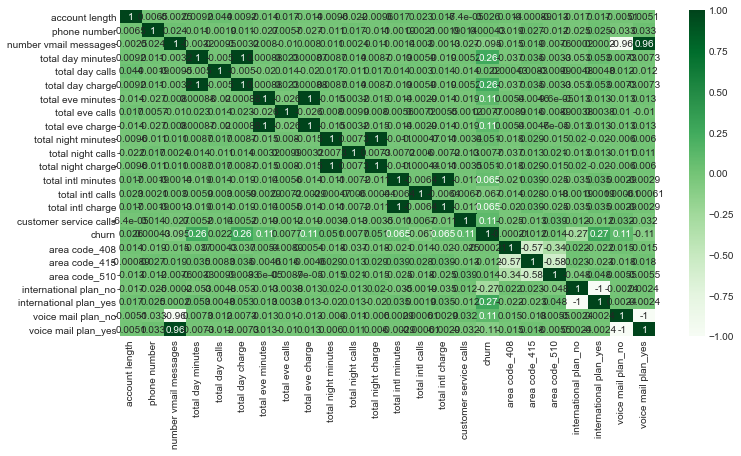

In [142]:
# checking for correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot= True, cmap='Greens')

This is a heat map showing the correlation of our features with white showing strong correlation.

In [39]:
# checking for descriptive statistics of our dataset
df.describe()

,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3162.000000,3162.000000,3.162000e+03,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,101.043960,437.301075,3.745091e+06,8.056293,180.321695,100.552498,30.655215,201.076028,100.101518,17.091664,200.950474,100.070525,9.042840,10.299684,4.404491,2.781433,1.438963
std,39.849594,42.447636,2.753562e+05,13.666637,54.272856,19.922261,9.226348,50.670579,19.699229,4.307005,50.550214,19.441272,2.274814,2.681579,2.211504,0.723988,1.119938
min,1.000000,408.000000,3.271058e+06,0.000000,2.600000,35.000000,0.440000,31.200000,36.000000,2.650000,43.700000,36.000000,1.970000,2.000000,1.000000,0.540000,0.000000
25%,74.000000,408.000000,3.506113e+06,0.000000,144.200000,87.000000,24.510000,166.700000,87.000000,14.170000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,3.742804e+06,0.000000,180.150000,101.000000,30.625000,201.500000,100.000000,17.130000,200.950000,100.000000,9.045000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,3.988319e+06,19.000000,216.900000,114.000000,36.870000,235.500000,113.000000,20.020000,235.950000,113.000000,10.617500,12.100000,6.000000,3.270000,2.000000
max,232.000000,510.000000,4.229964e+06,51.000000,350.800000,163.000000,59.640000,361.800000,168.000000,30.750000,367.700000,164.000000,16.550000,18.900000,12.000000,5.100000,4.000000


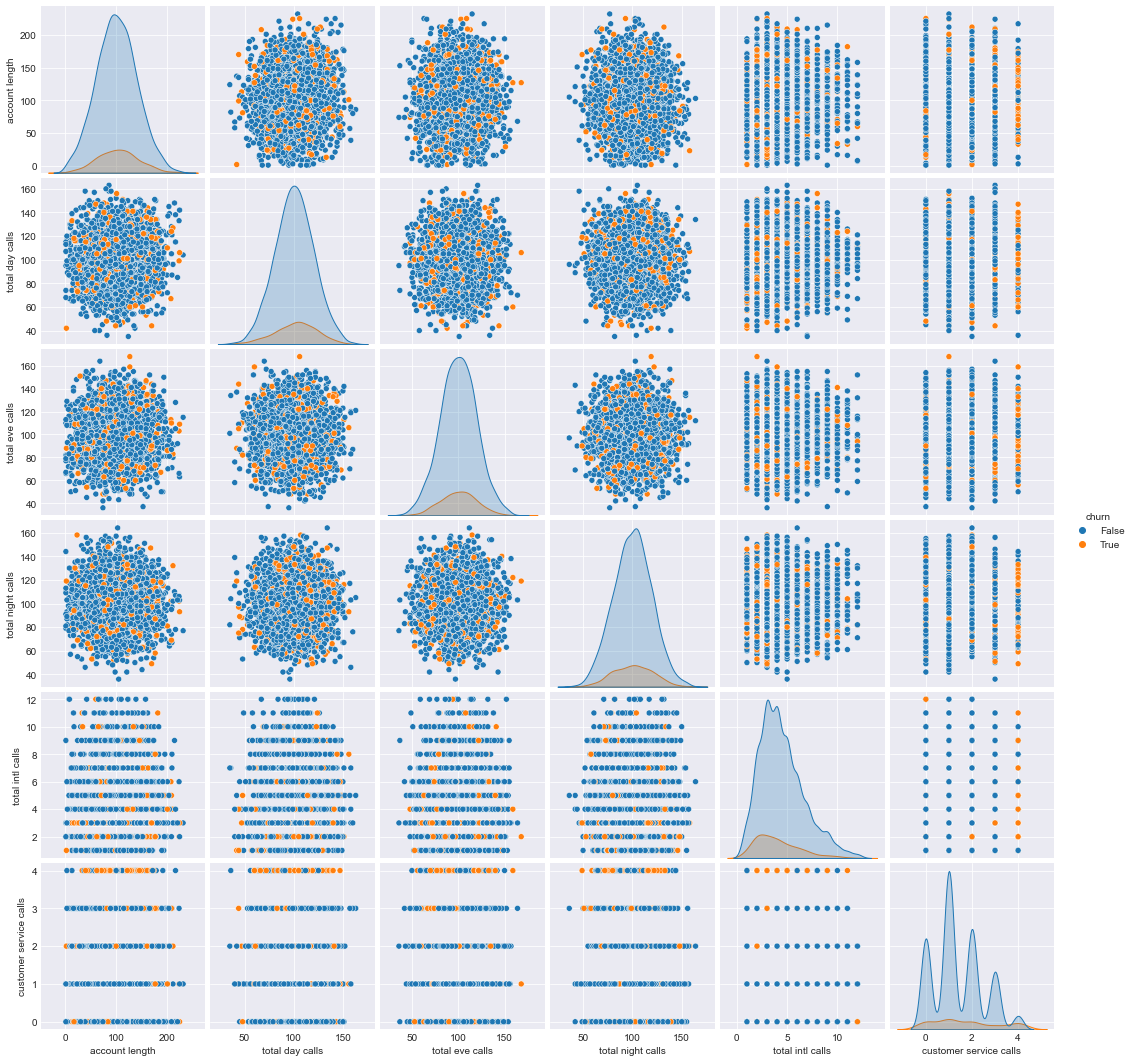

In [49]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data = data_temp, hue="churn",height=2.5)
plt.show()

#### Recomendation

1. Put new strategies in place such as marketing and advertising in place in states like NJ, SC and TX to       reduce churning rate
2. Maintain strategies in place in regions such as HI, AK and AZ 

### 4. Modeling

Before we start modeling we will carry out a few preprocessing activities such as spliting the data into train and test splits and scaling the data

##### Step 1: Transform categorical features into Numbers

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3162 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3162 non-null   object 
 1   account length          3162 non-null   int64  
 2   area code               3162 non-null   int64  
 3   phone number            3162 non-null   int32  
 4   international plan      3162 non-null   object 
 5   voice mail plan         3162 non-null   object 
 6   number vmail messages   3162 non-null   int64  
 7   total day minutes       3162 non-null   float64
 8   total day calls         3162 non-null   int64  
 9   total day charge        3162 non-null   float64
 10  total eve minutes       3162 non-null   float64
 11  total eve calls         3162 non-null   int64  
 12  total eve charge        3162 non-null   float64
 13  total night minutes     3162 non-null   float64
 14  total night calls       3162 non-null   

In [56]:
def unique_values(data):
    """
    this function returns the unique values and value counts of our object features
    """
    #checking for unique values 
    print(data.unique())
    #checking for value count
    print(data.value_counts())

In [57]:
unique_values(df['state'])

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'AZ' 'GA' 'AK'
 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CO' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM' 'NV'
 'DC' 'MD' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
WV    101
MN     79
OH     76
OR     75
WI     75
AL     75
NY     75
WY     71
VA     71
CT     71
ID     69
MI     68
TX     68
IN     68
KS     67
MT     67
UT     67
MD     66
NJ     66
VT     66
NC     64
WA     63
RI     63
NV     63
AZ     63
MS     63
MA     63
CO     61
FL     61
ME     61
SC     59
ND     58
DE     58
NE     58
NM     57
IL     57
SD     57
MO     57
OK     56
KY     55
DC     53
NH     53
TN     52
GA     50
HI     50
LA     50
AR     49
AK     49
PA     45
IA     43
CA     30
Name: state, dtype: int64


In [58]:
unique_values(df['international plan'])

['no' 'yes']
no     2853
yes     309
Name: international plan, dtype: int64


In [62]:
unique_values(df['voice mail plan'])

['yes' 'no']
no     2292
yes     870
Name: voice mail plan, dtype: int64


In [63]:
unique_values(df['churn'])

[False  True]
False    2749
True      413
Name: churn, dtype: int64


In [71]:
#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)

#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area code', 'international plan', 'voice mail plan'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3162 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3162 non-null   object 
 1   account length          3162 non-null   int64  
 2   phone number            3162 non-null   int32  
 3   number vmail messages   3162 non-null   int64  
 4   total day minutes       3162 non-null   float64
 5   total day calls         3162 non-null   int64  
 6   total day charge        3162 non-null   float64
 7   total eve minutes       3162 non-null   float64
 8   total eve calls         3162 non-null   int64  
 9   total eve charge        3162 non-null   float64
 10  total night minutes     3162 non-null   float64
 11  total night calls       3162 non-null   int64  
 12  total night charge      3162 non-null   float64
 13  total intl minutes      3162 non-null   float64
 14  total intl calls        3162 non-null   

We can see that other than our state feature everything else is ready for modeling

#### Step 2: Spliting the Dataset

We are going to split the dataset into training and testing data

In [81]:
#defining our dependent and independent variables
X = df.drop( ['churn', 'state'], axis=1)
y = df['churn']

In [83]:
#spliting the dataset into train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 77)

In [84]:
#shape
X_train.shape

(2529, 23)

In [85]:
#shape
X_test.shape

(633, 23)

### Creating Models
Now we are going to create 3 models, evaluate each model and do hyperparameter tuning to try and improve model performance and obseve which model fits our dataset best

We are going to train the following models:
  <li> Logistic regression
  <li> K-Nearest Neighbors
  <li> Decision Trees

#### Model 1: Logistic Regression Model

In [123]:
# Create a pipeline for preprocessing (Standardization, as there are no categorical columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Apply standardization to all numerical columns
    ]
)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Create a pipeline that includes preprocessing and the logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)
])

Now that we have created a pipeline, we can fit our model to the dataset 

Train Accuracy: 0.89
Test Accuracy: 0.88
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       543
           1       0.69      0.24      0.36        90

    accuracy                           0.88       633
   macro avg       0.79      0.61      0.65       633
weighted avg       0.86      0.88      0.85       633

Confusion Matrix (Test Data):
[[533  10]
 [ 68  22]]


Text(0.5, 1.0, 'Confusion Matrix')

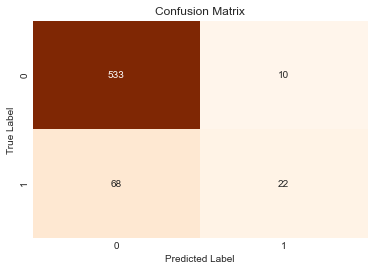

In [125]:
# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Predict churn for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the train and test scores
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for test data
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Oranges', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

Our Logistic Regression model has a training and Testing accuracy of 89% and 88% respectively which is good because the model is not over-fitting to the training data.

Classification Report:
<li>Precision:  The precision for not churned is 89% and churned is 69%
<li>Recall:    The recall for not churned is 98% and churned is 24%
<li>f1-score:  The F1-score for not churned is 93% and churned is 36%

Generally our model is not good at predicting the class 1[not churned] very well, this might be due to class imbalance. We will try and perform this tto see if the result improve or not

Train Accuracy: 0.76
Test Accuracy: 0.76
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       543
           1       0.35      0.79      0.49        90

    accuracy                           0.76       633
   macro avg       0.65      0.77      0.67       633
weighted avg       0.87      0.76      0.79       633

Confusion Matrix (Test Data):
[[412 131]
 [ 19  71]]


Text(0.5, 1.0, 'Confusion Matrix')

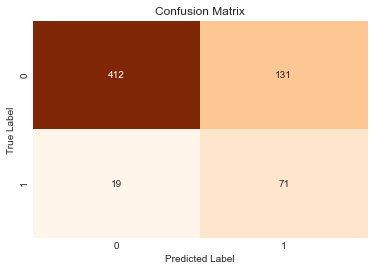

In [102]:
# Create a pipeline for preprocessing (Standardization, as there are no categorical columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Apply standardization to all numerical columns
    ]
)

# Initialize the logistic regression model
logreg_model = LogisticRegression(class_weight='balanced')

# Create a pipeline that includes preprocessing and the logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)
])

# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Predict churn for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the train and test scores
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for test data
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Oranges', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

Now that we have addressed the class imbalance, there is improvement in minority prediction but overally our model is not very stable since Training accuracy has reduced from 89% to now 76%. same for the testing accuracy which has reduced from 88% to 76%

Model 2:  K-Nearest Neighbors

We are going to build  a base model for our KNN

In [126]:
#instantiate the standard scaler
scaler = StandardScaler()

#fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5,  weights='uniform')

# Train the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

#Calculate train and test scores
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print(train_score)
print(test_score)


Accuracy: 0.8767772511848341
Precision: 0.6875
Recall: 0.24444444444444444
F1-score: 0.360655737704918
0.9145907473309609
0.8767772511848341


From this we can say our model is quite okay when it comes to fitting our data since the test score is 87% which is quite high.
<li>f1-score is 36%
<li>Precision is 68% 
<li>Recall is 24%



Text(0.5, 1.0, 'Confusion Matrix')

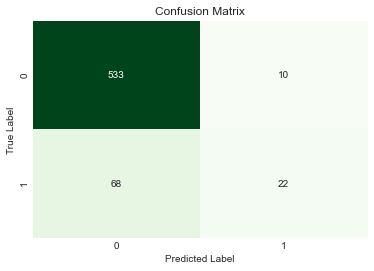

In [127]:
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

We are going to try and improve this results by introducing grid search and hyperparameter tuning to get the best parameters for our model

We are going to create a new KNN model that uses the best parameter and observe how our accuracy of the model changes 

In [110]:
# Define the parameter grid to search through
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to consider
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'p': [1, 2]                         # Power parameter for Minkowski distance
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found by GridSearch
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


For the best parameters;
 <li> n_neighbor = 3
 <li> p = 1
 <li> weights = 'uniform'

Now that we know the best parameters lets us create  a new model that uses the best parameter to predict 

In [128]:
# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                p=best_params['p'])

# Train the best KNN classifier on the training data
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data using the best KNN classifier
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate the best KNN model's performance
accuracy_best_knn = accuracy_score(y_test, y_pred_best)
precision_best_knn = precision_score(y_test, y_pred_best)
recall_best_knn = recall_score(y_test, y_pred_best)
f1_best_knn = f1_score(y_test, y_pred_best)

# Print the evaluation metrics of the best KNN model
print("\nBest KNN Model Performance:")
print("Accuracy:", accuracy_best_knn)
print("Precision:", precision_best_knn)
print("Recall:", recall_best_knn)
print("F1-score:", f1_best_knn)

#Calculate train and test scores
best_knn_train_score = best_knn.score(X_train_scaled, y_train)
best_knn_test_score = best_knn.score(X_test_scaled, y_test)

print(best_knn_train_score)
print(best_knn_test_score)


Best KNN Model Performance:
Accuracy: 0.8846761453396524
Precision: 0.673469387755102
Recall: 0.36666666666666664
F1-score: 0.4748201438848921
0.9343614076710162
0.8846761453396524


From the new model created we can see that our model testing accuracy has increased 87% to 88%.
<li> Precision 67%
<li> Recall 36%
<li> fi-score is 47%
<li> Testing accuracy is 88%

Text(0.5, 1.0, 'Confusion Matrix')

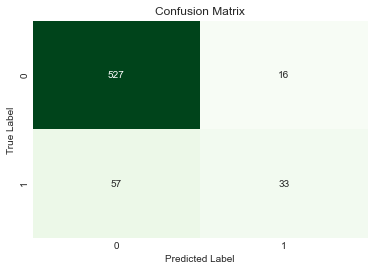

In [129]:
#plotting confusion metrics
confusion_mat = confusion_matrix(y_test, y_pred_best)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

#### Model 3: Decission Tree Classifier

In [130]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the encoded training data
clf.fit(X_train, y_train)

# Make predictions on the encoded testing data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
clf_accuracy = accuracy_score(y_test, y_pred)
clf_precision = precision_score(y_test, y_pred)
clf_recall = recall_score(y_test, y_pred)
clf_f1 = f1_score(y_test, y_pred)

print('Accuracy ', clf_accuracy)
print('Precision ', clf_precision)
print('Recall ', clf_recall)
print('f1_Score ', clf_f1)

#Calculate train and test scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

Accuracy  0.9146919431279621
Precision  0.6764705882352942
Recall  0.7666666666666667
f1_Score  0.71875
train score  1.0
test score  0.9146919431279621


#### Summary of the Result


<li>Model accuracy is 91%
<li>Model Precision is 67%
<li>Recall is 76%
<li>f1-score is 71%
<li> the test score is 91%

Text(0.5, 1.0, 'Confusion Matrix')

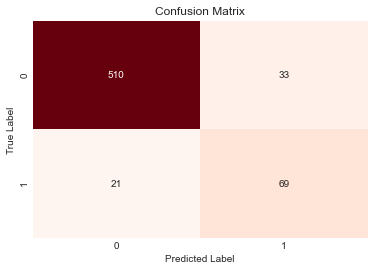

In [131]:
#plotting confusion metrics
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

we will try and imporve the perfomance of model just like we did with KNN model by finding the best parameters for our model

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
# Define the parameter grid
param_grid = {
    'max_depth': range(1,11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 21, 2),
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize a scorer for the grid search
scorer = make_scorer(accuracy_score)

# Initialize the grid search
grid_obj = GridSearchCV(clf, param_grid, scoring=scorer, cv=5)

# Fit the grid search object to the data
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf1 = grid_obj.best_estimator_
clf1


DecisionTreeClassifier(max_depth=9, min_samples_split=4)

now that we have the best parameters we will use this parameters to try and imporve the perfomance of our model

In [145]:
# Fit the best algorithm to the data
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))

# After fitting the grid search object to the data
print('Best Parameters: ', grid_obj.best_params_)
print('Best Score: ', grid_obj.best_score_)

# Calculate and print the metrics
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ', f1_score(y_test,y_pred))

#Calculate train and test scores
train_score = clf1.score(X_train, y_train)
test_score = clf1.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

Accuracy:  0.9510268562401264
Best Parameters:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best Score:  0.9470167886353853
Accuracy:  0.9510268562401264
Precision:  0.8554216867469879
Recall:  0.7888888888888889
F1 Score:  0.8208092485549133
train score  0.9754843811783314
test score  0.9510268562401264


Text(0.5, 1.0, 'Confusion Matrix')

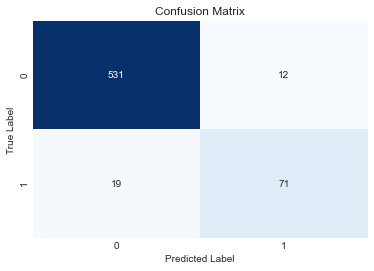

In [148]:
#plotting confusion metrics
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

The accuracy of our model has now increased from 91 to 95% which is great.
Also our model precision has also increase to 83%
F1-score has increased from 71% to 78%

#### Comparing the modules based on accuracy

Now that we have done base module and improved module for each of our 3 modules, we can compare them using the accuracy score and see which module fits our data the most when it comes to prediction

<ul> Model 1: 
<br>
       <li> base logistic regression test score = 88%
       <li> Imporved logistic regression t-score = 76% 
<ul>

<ul> Model 2:
<br>
       <li> base KNN classifier test score = 87%
       <li> improved KNN classifier test score =88%
<ul>


<ul> Model 3:
       <li> base Decision Tree classifier test score = 91%
       <li> improved Decision Tree classifier test score = 94%
<ul>



from the test score, Module 3 is the best in predicting whether a customer will churn or not

### Ploting Roc curves to determine the best Module

let us evaluate our modules using Roc curves and determine which is the best

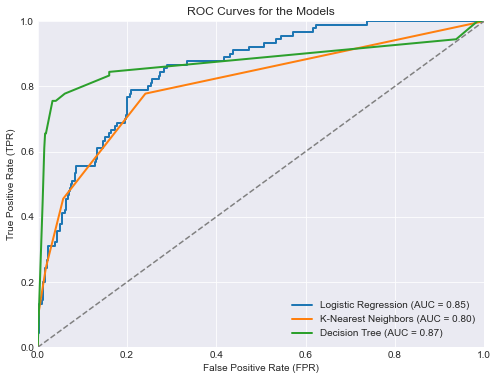

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize the classifiers
lg = LogisticRegression(class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

classifiers = [lg, knn, dt]
names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))

# Loop through each classifier and plot its ROC curve
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for the Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Again after ploting the roc-curve, Decision Tree performed better than Logistic regression and K-nearest Neighbor since it has a largest area under the curve. 

This was to prove that Desicion Tree is the best module out of the 3 modules we built in predicting the whether a customer is going to churn or not

### Recomendation and conclusion

1. I would recomemend SyriaTel communication to use Decision tree Model in predicting whether a customer will churn or not therefore reducing the cost of trying to retain customers 

2. Put new strategies in place such as marketing and advertising in states like NJ, SC and TX to reduce churning rate and increase market reach 

3. Maintain the same strategies of retaining customers in states like HI, AK and AZ since churning rate is very low

### Next Steps

For the next step i wuould recommenc the company to include promotions and offers given to their customers since i believe it is very important feature to consider when predicting churning rate of customers